In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import george
from george import kernels
from george.kernels import ExpSquaredKernel

In [5]:
dt = 0.5
t = np.arange(-15,50,dt)

In [6]:
mus = np.load('mus.npy')
stds = np.load('stds.npy')
musShifted = np.load('musShifted.npy')
stdsShifted = np.load('stdsShifted.npy')

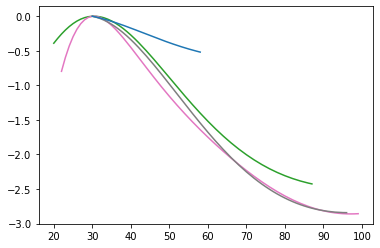

In [17]:
for lc in musShifted[:,0,:]:
    plt.plot(lc)

In [5]:
mdata = np.ma.filled(musShifted[:,j,:][:,indx], np.nan)
np.nanpercentile(mdata, [25, 50, 75])

NameError: name 'j' is not defined

In [6]:
mask = np.isnan(mus) + ~np.isfinite(mus) +\
                                   np.isnan(stds) + ~np.isfinite(stds) +\
                                   ~np.isfinite(1.0/stds)
maskShifted = np.isnan(musShifted) + ~np.isfinite(musShifted) +\
                                   np.isnan(stdsShifted) + ~np.isfinite(stdsShifted) +\
                                   ~np.isfinite(1.0/stdsShifted)

In [7]:
mus = np.ma.masked_array(mus, mask)
stds = np.ma.masked_array(stds, mask)





musShifted = np.ma.masked_array(musShifted, maskShifted)
stdsShifted = np.ma.masked_array(stdsShifted, maskShifted)



In [8]:
mu_ = []
std_ = []
mushifted_ = []
stdshifted_ = []

l = 8

for i, j in enumerate(mus[:,l]):
    if(np.sum(~np.isnan(j)))>0:
        mu_.append(j)
        
    if(np.sum(~np.isnan(stds[i,0])))>0:
        std_.append(stds[i,0])
        
for i, j in enumerate(musShifted[:,l]):
    if(np.sum(~np.isnan(j)))>0:
        mushifted_.append(j)
        
    if(np.sum(~np.isnan(stdsShifted[i,0])))>0:
        stdshifted_.append(stds[i,0])
        
#     print(stdsShifted[i,0])
    
    

In [10]:
j = l
avg = np.zeros(130)*np.nan
std = np.zeros(130)*np.nan
mean = np.zeros(130)*np.nan
for i in range(130):
    
    if len(musShifted[:,j,:][:,i][~musShifted[:,j,:][:,i].mask])<2:
        continue
#     print((musShifted[:,j,:][:,i][~musShifted[:,j,:][:,i].mask]))
    avg[i] = (np.ma.average(musShifted[:,j,:][:,i], weights = 1.0/stdsShifted[:,j,:][:,i]**2))
    std[i] = np.ma.std(stdsShifted[:,j,:][:,i],axis=0)
    mean[i] = np.ma.mean(musShifted[:,j,:][:,i])
#     print(t[i],(musShifted[:,j,:][:,i][~musShifted[:,j,:][:,i].mask]), avg[i], mean[i])



In [30]:
(np.ma.count(musShifted[:,j,:][:,indx], axis = 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
window = 3
N = len(t)
wmu = np.zeros(N) * np.nan
med = np.zeros(N) * np.nan
std = np.zeros(N) * np.nan
wstd = np.zeros(N) * np.nan
for i, hour in enumerate(t):
    # i need at least 1 datapoint within 3 hours of the target hour (to take median)
    indx = (t >= hour - 0.5*window) * (t < hour + 0.5*window)
    #print (i, hour + window/2., indx.sum())

    #remove if less than 3 datapoints within 4 hours

    print(indx.sum())
    if indx.sum()<2: #< 3:
        
        continue
    
    if np.sum(np.ma.count(musShifted[:,j,:][:,indx], axis = 1)/indx.sum())<2.0:
        continue

    #weighted average weighted by errorbars within hour and hour+window

    weights = 1.0 / ((stdsShifted[:,j,:][:,indx])**2)

    wmu[i] = np.ma.average(musShifted[:,j,:][:,indx],
                        weights=weights)
    
    std[i] = np.ma.std(stdsShifted[:,j,:][:,indx]) 

    wstd[i] = np.ma.average((musShifted[:,j,:][:,indx]-wmu[i])**2,
                         weights=weights)

3
4
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
4


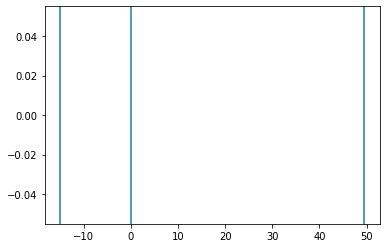

In [12]:
c = 0
for i in mushifted_:
#     print(c)
    plt.plot(t,i,'.')
    c +=1
# plt.plot(t,avg, 'r-')
# plt.fill_between(t, avg-std, avg+std)
# plt.plot(t,mean, '-')
plt.plot(t,wmu, 'k-', linewidth=2)
plt.fill_between(t, wmu - wstd, wmu + wstd, color = 'grey', alpha=0.4)
# plt.plot(t,mu_[-6],'.')
# plt.plot(t,mu_[-2],'.')
# plt.plot(t,mushifted_[-6],'.')
# plt.plot(t,mushifted_new,'.')
plt.axvline(t.min())
plt.axvline(0)
plt.axvline(t.max())
# plt.xlim(-15,0)

In [7]:
# i = mu_[-6]
# i_std = std_[-6]

# truemax = np.where(np.array(i == np.nanmax(i[tcore])))[0][0]
# t2 = t-t[truemax]
# t20 = np.where(t2==0)[0][0]
# tmin, tmax = t2.min(), t2.max()
# yoffset = i[t20]

# mushifted_new = np.zeros(len(i))*np.nan
# stdshifted_new = np.zeros(len(i))*np.nan

# tcore = (t>-10) * (t<20)

# if t.min()>tmin:
#     ind_max = np.where(t == t.max()-t[truemax])[0][0]
#     mushifted_new[:ind_max] = i[-ind_max:]
#     stdshifted_new[:ind_max] = i_std[-ind_max:]
    
# else:
#     ind_min = np.where(t == t.min()-t[truemax])[0][0]
#     mushifted_new[ind_min:] = i[:-ind_min]
#     stdshifted_new[ind_min:] = i_std[:-ind_min]
    
    




In [165]:
x = (mus[:,j,:])

In [166]:
len(x[:,0])

166

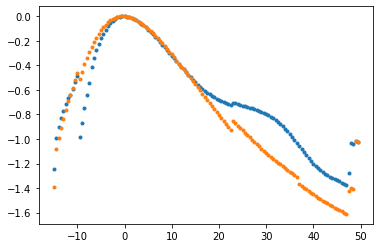

In [221]:
plt.plot(t,avg, '.')
plt.plot(t,mean, '.')
# plt.plot(t, np.ma.average(musShifted[:,j,:], axis=0, weights = 1.0/stdsShifted[:,j,:]**2),'-')
# plt.gca().invert_yaxis()

In [210]:
# i = mu_[-1]
# k = mu_[-1]
# plt.plot(t, i, label= 'mu')
# plt.plot(t, mushifted_new, label='mu shifted new')
# plt.plot(t[:-truemax], i[:-truemax]+0.1, label='mus')
# plt.plot(t[truemax:], i[truemax:]+0.5, label = 'musShifted')
# plt.axvline(t.min())
# plt.axvline(t.max())
# plt.legend()


In [211]:
# if tmin >= t[0]:

#     musShifted[i][j][truemax:] = (mus[i][j] + meansmooth(t))[:-truemax]
#     stdsShifted[i][j][truemax:] = std[:-truemax]

# if tmin < t[0]:
#     tstart = np.where(t2 == t[0])[0][0]
#     musShifted[i][j][:-tstart] = (mus[i][j] + meansmooth(t) -
#                                   yoffset)[tstart:]
#     stdsShifted[i][j][:-tstart] = std[tstart:]